In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in the dataset
bank=pd.read_csv(r"C:\Users\pc-pc\Downloads\loan\loan1.csv")
bank.shape

#Here, there are 111 columns. we might not necessarily have every 111 column for our analysis, so lets start screening out the columns that we are not interested in.

C:\Users\pc-pc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(39717, 111)

In [3]:
#Dropping columns has all values as NA
bank.dropna(axis=1,how='all',inplace=True)

In [4]:
bank.shape
#now, we see that we have 57 columns which are remaining after dropping all NAN columns

(39717, 57)

In [5]:
# LETS DROP THE COLUMNS WHICH WE WONT BE MAKING USE OF IN THE ANALYSIS --

#'member_id' and 'id' gives unique representation of each data entry. so, lets drop either of them. Here, we've dropped 'member_id'
#'employee_title' is cant be grouped to make analysis on it. hence we drop it too.
#'url' gives us less information and cant be used in our analysis
#'zip_code' is dropped because of the fact that we have a column representing the state.

bank=bank.drop(['member_id','emp_title','url','desc','title','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d'],axis=1)
bank.shape

(39717, 41)

In [6]:
#drop columns which has the same value
bank=bank.drop(bank.columns[bank.nunique()==1],axis=1)

In [7]:
bank.shape

(39717, 32)

In [8]:
#create a dataframe for fully_paid borrowers
fully_paid=bank.loc[bank.loan_status=='Fully Paid']
fully_paid.shape


(32950, 32)

In [9]:
#create a dataframe for borrowers who are in the course of paying their loan
current=bank.loc[bank.loan_status=='Current']
current.shape

(1140, 32)

In [10]:
#create a dataframe for borrowers who have been defaulted
charged_off=bank.loc[bank.loan_status=='Charged Off']
charged_off.shape

(5627, 32)

In [11]:
# look out for the columns that have the same values 
fully_paid.columns[fully_paid.nunique()==1].tolist()


['loan_status', 'recoveries', 'collection_recovery_fee']

In [12]:
fully_paid.loc[:,['loan_status','recoveries','collection_recovery_fee']]
#here, we see that all the entries in these two columns are 0

#so, we can drop them

,loan_status,recoveries,collection_recovery_fee
0,Fully Paid,0.0,0.0
2,Fully Paid,0.0,0.0
3,Fully Paid,0.0,0.0
5,Fully Paid,0.0,0.0
6,Fully Paid,0.0,0.0
7,Fully Paid,0.0,0.0
10,Fully Paid,0.0,0.0
11,Fully Paid,0.0,0.0
13,Fully Paid,0.0,0.0
15,Fully Paid,0.0,0.0


In [13]:
#we look at the columns which has unique value. 
#note: 'recoveries' and 'charged_off' is not displayed here. maybe, it has NAN values in them. Lets check it out
charged_off.columns[charged_off.nunique()==1].tolist()

['loan_status']

In [14]:
fully_paid.loc[:,['loan_status','recoveries','collection_recovery_fee']]
#yes, it has NAN values in them. so, lets drop these columns directly.

,loan_status,recoveries,collection_recovery_fee
0,Fully Paid,0.0,0.0
2,Fully Paid,0.0,0.0
3,Fully Paid,0.0,0.0
5,Fully Paid,0.0,0.0
6,Fully Paid,0.0,0.0
7,Fully Paid,0.0,0.0
10,Fully Paid,0.0,0.0
11,Fully Paid,0.0,0.0
13,Fully Paid,0.0,0.0
15,Fully Paid,0.0,0.0


In [15]:
#dropping off 'recoveries' and 'collection_recovery_fee' from the fully_paid dataframe
fully_paid=fully_paid.drop(['recoveries','collection_recovery_fee'],axis=1)

In [16]:
#dropping off 'recoveries' and 'collection_recovery_fee' from the charged_off dataframe
charged_off=charged_off.drop(['recoveries','collection_recovery_fee'],axis=1)

In [17]:
#Lets just take borrowers whose loan is fully paid and who have been charged_off
#since 'current' category people will still be under the judgement of whether they'll pay their loan or not, 
#we are not considering them for our analysis here.

loan=pd.concat([fully_paid,charged_off])
loan.shape

(38577, 30)

In [18]:
#Rounding off the values to 2 decimal places
loan['funded_amnt_inv'].round(2)
loan['installment'].round(2)
loan['annual_inc'].round(2)
loan['dti'].round(2)

0        27.65
2         8.72
3        20.00
5        11.20
6        23.51
7         5.35
10       16.12
11       10.78
13       12.56
15       20.31
16       18.60
17       10.52
18       18.44
19        9.86
20       26.53
22       11.18
23       16.01
25       29.44
28        5.63
29       12.19
30       20.34
31       14.03
33       11.93
34        6.35
35       11.80
36        5.50
37        8.48
38       10.62
40        6.63
41       16.70
         ...  
39536    15.30
39537     7.02
39540    12.16
39548    16.70
39554     3.83
39559    18.68
39578     2.97
39579    16.97
39582    24.01
39584    24.85
39593    16.87
39598     8.14
39600     5.83
39601    11.78
39603    12.77
39609    14.40
39613     0.00
39621     3.26
39623     5.08
39626     9.80
39638    10.20
39640    16.89
39652    12.24
39653     2.86
39666    13.50
39667    20.00
39668    20.00
39669     6.45
39678    14.47
39688    10.15
Name: dti, Length: 38577, dtype: float64

In [19]:
loan['diff_amnt']=loan['loan_amnt']-loan['funded_amnt']

In [20]:
loan['diff_amnt_inv']=loan['funded_amnt']-loan['funded_amnt_inv']

In [21]:
#substitute NANs with 0
loan.loc[pd.isnull(loan['pub_rec_bankruptcies']),'pub_rec_bankruptcies'] = 0

In [22]:
## to test --
loan.loc[loan['id']== 69001]


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,diff_amnt,diff_amnt_inv
35006,69001,15000,15000,14875.0,36 months,8.94%,476.58,A,A5,< 1 year,...,0.0,6,0,7586,52.70%,19,Aug-15,0.0,0,125.0


In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39688
Data columns (total 32 columns):
id                        38577 non-null int64
loan_amnt                 38577 non-null int64
funded_amnt               38577 non-null int64
funded_amnt_inv           38577 non-null float64
term                      38577 non-null object
int_rate                  38577 non-null object
installment               38577 non-null float64
grade                     38577 non-null object
sub_grade                 38577 non-null object
emp_length                37544 non-null object
home_ownership            38577 non-null object
annual_inc                38577 non-null float64
verification_status       38577 non-null object
issue_d                   38577 non-null object
loan_status               38577 non-null object
purpose                   38577 non-null object
addr_state                38577 non-null object
dti                       38577 non-null float64
delinq_2yrs               

In [24]:
#remove '%' from 'int_rate' & 'revol_util'
loan.int_rate = loan.int_rate.apply(lambda x: x.split('%')[0])
loan.revol_util = loan.revol_util.astype(str).apply(lambda x: x.split('%')[0]) 

In [25]:
#remove spaces at the front and rear of the value in 'term' column
charged_off.term=charged_off['term'].str.strip()
loan.term=loan['term'].str.strip()

In [26]:
term_categories=charged_off.term.unique()
n=len(term_categories)
print(term_categories)


['60 months' '36 months']


PERCENTAGE OF DEFAULTERS BASED ON LOAN TERM :
60 months : 25.31 %
36 months : 11.09 %


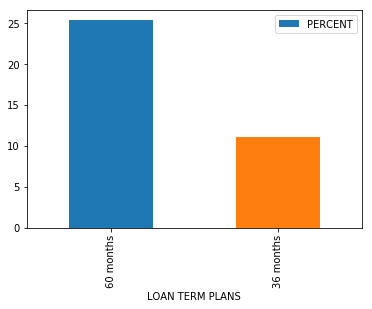

In [27]:
propotion_term=[]
print("PERCENTAGE OF DEFAULTERS BASED ON LOAN TERM :")
for i in range(0,n):
    propotion_term.append(((len(charged_off[(charged_off['term']==term_categories[i])]))/(len(loan[(loan['term']==term_categories[i])])))*100)

for i in range(0,n):
    propotion_term[i]=round(propotion_term[i],2)
for i in range(0,n):
    print(term_categories[i],':',propotion_term[i],'%')
    
    
term_plot = pd.DataFrame({'LOAN TERM PLANS':term_categories, 'PERCENT':propotion_term})
term_plot.plot(x='LOAN TERM PLANS',y='PERCENT',kind='bar')
plt.show()

### RESULT : If the loan duration is 60 months, there is a higher probability for the loan to be defaulted


In [28]:
home_categories=charged_off.home_ownership.unique()
n=len(home_categories)
print(home_categories)

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


PERCENTAGE OF DEFAULTERS BASED ON HOME OWNERSHIP :
RENT : 15.36 %
OWN : 14.89 %
MORTGAGE : 13.67 %
OTHER : 18.37 %


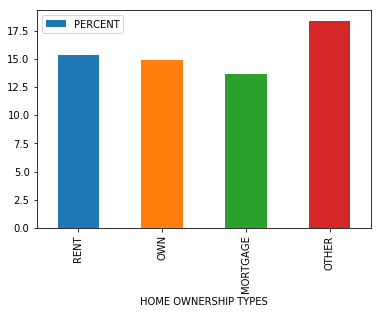

In [29]:
propotion_home_ownership=[]
print("PERCENTAGE OF DEFAULTERS BASED ON HOME OWNERSHIP :")
for i in range(0,n):
    propotion_home_ownership.append(((len(charged_off[(charged_off['home_ownership']==home_categories[i])]))/(len(loan[(loan['home_ownership']==home_categories[i])])))*100)

for i in range(0,n):
    propotion_home_ownership[i]=round(propotion_home_ownership[i],2)
for i in range(0,n):
    print(home_categories[i],':',propotion_home_ownership[i],'%')
    
    
home_ownership_plot = pd.DataFrame({'HOME OWNERSHIP TYPES':home_categories, 'PERCENT':propotion_home_ownership})
home_ownership_plot.plot(x='HOME OWNERSHIP TYPES',y='PERCENT',kind='bar')
plt.show()

In [30]:
verification_status_category=charged_off.verification_status.unique()
n1=len(verification_status_category)
print(verification_status_category)

['Source Verified' 'Verified' 'Not Verified']


PERCENTAGE OF DEFAULTERS BASED ON VERFICATION STATUS :
Source Verified : 14.82 %
Verified : 16.8 %
Not Verified : 12.83 %


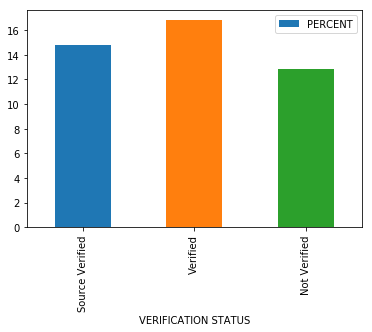

In [31]:
propotion_verification_status=[]
print("PERCENTAGE OF DEFAULTERS BASED ON VERFICATION STATUS :")
for i in range(0,n1):
     propotion_verification_status.append(((len(charged_off[(charged_off['verification_status']==verification_status_category[i])]))/(len(loan[(loan['verification_status']==verification_status_category[i])])))*100)

for i in range(0,n1):
    propotion_verification_status[i]=round(propotion_verification_status[i],2)
    print(verification_status_category[i],':',propotion_verification_status[i],'%')
    

verification_status_plot = pd.DataFrame({'VERIFICATION STATUS':verification_status_category, 'PERCENT':propotion_verification_status})
verification_status_plot.plot(x='VERIFICATION STATUS',y='PERCENT',kind='bar')
plt.show()

In [32]:
purpose_category=charged_off.purpose.unique()
n1=len(purpose_category)
print(purpose_category)

['car' 'small_business' 'other' 'debt_consolidation' 'major_purchase'
 'credit_card' 'home_improvement' 'moving' 'vacation' 'house' 'medical'
 'wedding' 'renewable_energy' 'educational']


PERCENTAGE OF DEFAULTERS BASED ON VERFICATION STATUS :
car : 10.67 %
small_business : 27.08 %
other : 16.38 %
debt_consolidation : 15.33 %
major_purchase : 10.33 %
credit_card : 10.78 %
home_improvement : 12.07 %
moving : 15.97 %
vacation : 14.13 %
house : 16.08 %
medical : 15.57 %
wedding : 10.37 %
renewable_energy : 18.63 %
educational : 17.23 %


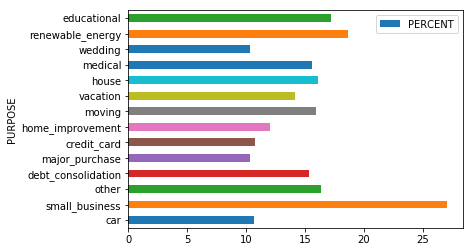

In [33]:
propotion_purpose=[]
print("PERCENTAGE OF DEFAULTERS BASED ON PURPOSE :")
for i in range(0,n1):
    propotion_purpose.append(((len(charged_off[(charged_off['purpose']==purpose_category[i])]))/(len(loan[(loan['purpose']==purpose_category[i])])))*100)

for i in range(0,n1):
    propotion_purpose[i]=round(propotion_purpose[i],2)
for i in range(0,n1):
    print(purpose_category[i],':',propotion_purpose[i],'%')

    
purpose_plot = pd.DataFrame({'PURPOSE':purpose_category, 'PERCENT':propotion_purpose})
purpose_plot.plot(x='PURPOSE',y='PERCENT',kind='barh')
plt.show()

In [34]:
emp_length_category=charged_off.emp_length.unique()
n1=len(emp_length_category)
print(emp_length_category)


['< 1 year' '4 years' '3 years' '10+ years' '1 year' '9 years' '2 years'
 '8 years' '7 years' '5 years' nan '6 years']


In [37]:
emp_length_category=charged_off.emp_length.unique()
n1=len(emp_length_category)
print(emp_length_category)
print(n1)

['< 1 year' '4 years' '3 years' '10+ years' '1 year' '9 years' '2 years'
 '8 years' '7 years' '5 years' nan '6 years']
12


In [89]:
propotion_emp_length=[]
print("PERCENTAGE OF DEFAULTERS BASED ON YEAR OF EXPERIENCE :")

for i in range(0,n1-2):
    propotion_emp_length.append(((len(charged_off[(charged_off['emp_length']==emp_length_category[i])]))/(len(loan[(loan['emp_length']==emp_length_category[i])])))*100)

temp=((len(charged_off[(charged_off['emp_length']=='6 years')]))/(len(loan[(loan['emp_length']=='6 years')])))*100
temp1=round(t,2)

propotion_emp_length1=[propotion_emp_length,temp1]


for i in range(0,n1-2):
    propotion_emp_length[i]=round(propotion_emp_length[i],2)
    

for i in range(0,n1-2):
    print(emp_length_category[i],':',propotion_emp_length[i],'%')

print(emp_length_category[11],':',propotion_emp_length1[1],'%')


PERCENTAGE OF DEFAULTERS BASED ON YEAR OF EXPERIENCE :
< 1 year : 14.17 %
4 years : 13.82 %
3 years : 13.83 %
10+ years : 15.68 %
1 year : 14.39 %
9 years : 12.89 %
2 years : 13.21 %
8 years : 14.15 %
7 years : 15.37 %
5 years : 14.34 %
6 years : 14.16 %


### RESULT - Most of the defaulters fall under the 10+ years category with the highest percentage of 15.68% 